In [47]:
import  numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans


### Loading the dataset

In [51]:
df=pd.read_csv('Iris.csv')
df.head( )

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Creating new data frame with PetalLengthCm,PetalWidthCm

In [81]:
newdf=pd.DataFrame(df,columns=['PetalLengthCm','PetalWidthCm'])
newdf.head(5)

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


### Building the K Mean Cluster model

In [42]:
model = KMeans(n_clusters=3)
y_pred=model.fit_predict(newdf)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### The centroids of three clusters

In [60]:
model.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.464     , 0.244     ],
       [4.26923077, 1.34230769]])

In [43]:
newdf['cluster']=y_pred
newdf.head()

,PetalLengthCm,PetalWidthCm,cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


### Elbow method

In [77]:

wcss = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(newdf)
    wcss.append(km.inertia_)
    

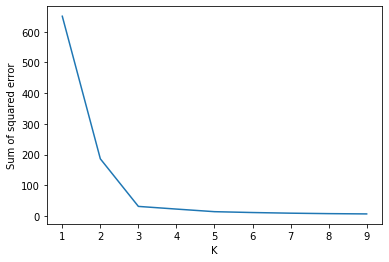

In [78]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,wcss)

## Visualization of the clusters and their centroids

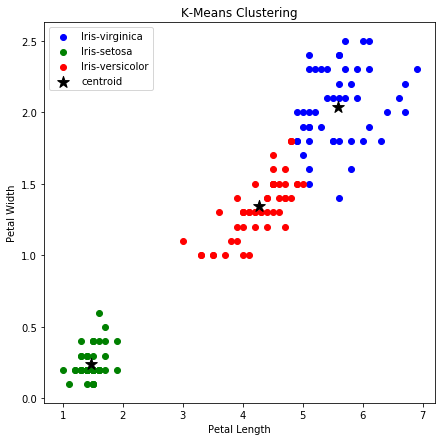

In [80]:
df1 = newdf[newdf.cluster==0]
df2 = newdf[newdf.cluster==1]
df3 = newdf[newdf.cluster==2]
plt.figure(figsize=(7,7))
plt.scatter(df1['PetalLengthCm'],df1['PetalWidthCm'],color='blue',label = 'Iris-virginica')
plt.scatter(df2['PetalLengthCm'],df2['PetalWidthCm'],color='green',label = 'Iris-setosa')
plt.scatter(df3['PetalLengthCm'],df3['PetalWidthCm'],color='red',label = 'Iris-versicolor')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],color='black',marker='*',label='centroid',s=150)
plt.legend()
plt.title('K-Means Clustering')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')           
plt.show()